# Example usage of sqrt UKF

This example uses the UKF to solve a linear observability problem.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [8]:
import ukf_sqrt

# Generate some data

In [9]:
x0 = np.matrix([[0], [10]])
A = np.matrix([[1, 0.01], [0, 0.98]])
x = copy.copy(x0)

for i in range(100):
    xnew = A*x[:,-1]
    x = np.hstack((x, xnew))
    
dt = 0.01

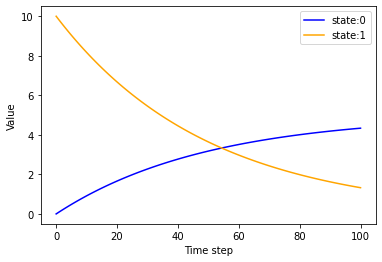

In [10]:
plt.plot(x[0,:].T, color='blue', label='state:0')
plt.plot(x[1,:].T, color='orange', label='state:1')

plt.xlabel('Time step')
plt.ylabel('Value')

plt.legend()

# Measurements and controls

In [11]:
# add some measurements noise
noise_percent = 30
pos = (x[0, :]).reshape(1,-1) 
measurement_noise = noise_percent/100*np.std(pos)*np.random.randn(*pos.shape)

# the measurements
y = x[0,:] + measurement_noise

# how many measurements are there?
N = y.shape[1]

In [13]:
# the controls (no control)
u = np.zeros([1, y.shape[1]])


101


# Define measurement and process nonlinear dynamics

In [14]:
# measurement dynamics
def h(x, u, w):
    y = np.vstack((x[0,:] + w[0, :]))
    return y

In [15]:
# process dynamics
def f(x, u, w):
    p, v = np.ravel(x[:,-1])
    u = np.ravel(u[:,-1])
    xhat = np.vstack((p + v*dt,
                      0.98*v))
    return xhat

# Covariances

In [21]:
# process covariance
Q = np.matrix(1e-10*np.eye(2))

# make it a 3D matrix in time
Q = np.tile(np.expand_dims(Q, 2), N)

In [22]:
# measurement covariance
R = np.matrix(np.eye(1))
R[0,0] = np.std(measurement_noise)**2

# make it a 3D matrix in time
R = np.tile(np.expand_dims(R, 2), N)

# Run the UKF

In [23]:
xhat, P, s = ukf_sqrt.ukf_sqrt(y, x0, f, h, Q, R, u)
print(xhat.shape)

(2, 101)


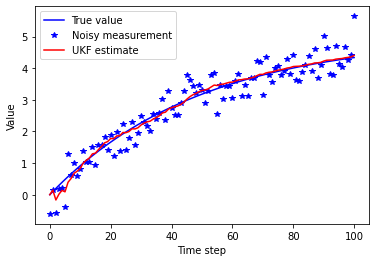

In [24]:
plt.plot(x[0,:].T, color='blue', label='True value')
plt.plot(y[0,:].T, '*', color='blue', label='Noisy measurement')
plt.plot(xhat[0,:].T, color='red', label='UKF estimate')

plt.xlabel('Time step')
plt.ylabel('Value')

plt.legend()

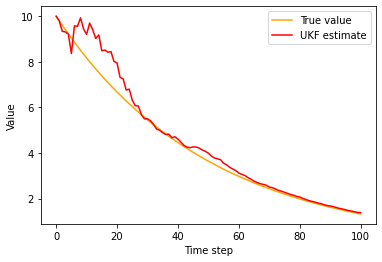

In [25]:
plt.plot(x[1,:].T, color='orange', label='True value')
plt.plot(xhat[1,:].T, color='red', label='UKF estimate')

plt.xlabel('Time step')
plt.ylabel('Value')

plt.legend()

Text(0, 0.5, 'Covariance')

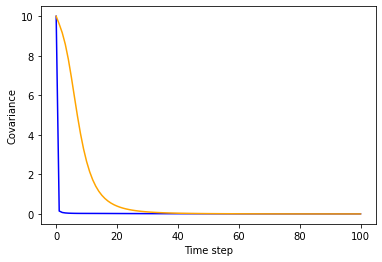

In [26]:
plt.plot(P[0,0,:].T, color='blue')
plt.plot(P[1,1,:].T, color='orange')

plt.xlabel('Time step')
plt.ylabel('Covariance')